In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers


In [2]:
image_size=(256,256)
Batch_size=32
ds=tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=image_size,
    batch_size=Batch_size
    
)


Found 2152 files belonging to 3 classes.


In [3]:
ds.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(ds)# i.e as we have divided the whole set into batches of 32 so here the len represents the there are 68 batches of size 32

68

In [5]:
class_names=ds.class_names

In [6]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
##we have tensor objects in the data sets

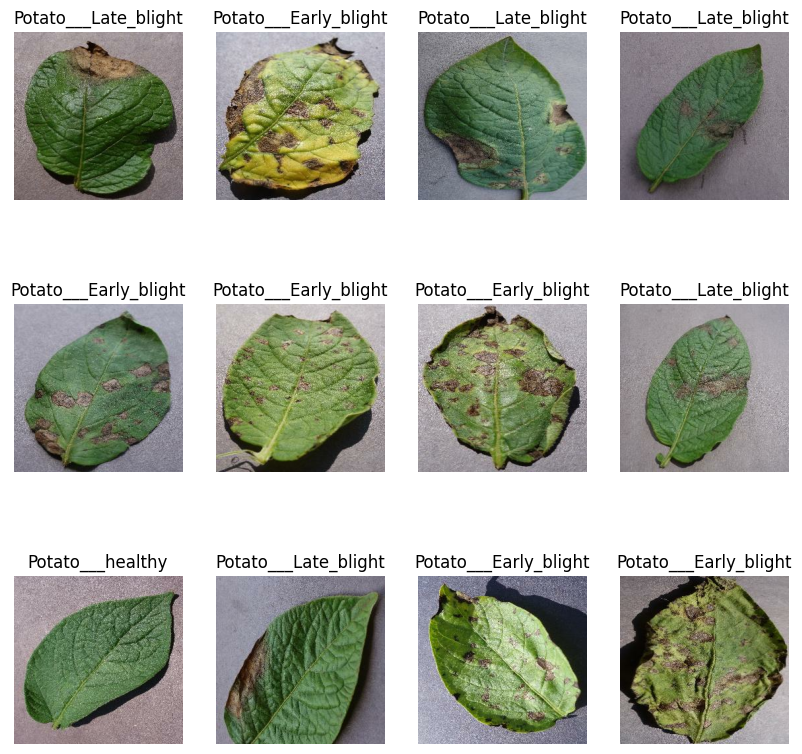

In [8]:
plt.figure(figsize=(10,10))
for images,labels in ds.take(1) :
    for i in range(12) :
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis(False)
        plt.title(class_names[labels[i].numpy()])

In [9]:
#train test split
#80 percent of data for training 
# 10 percent for validation
# 10 percent for test

In [10]:
def train_test_split(ds,train_size=0.8,val_size=0.1,test_size=0.1) :
    train_len=int(train_size*len(ds))
    train_ds=ds.take(train_len)
    valid_len=int(val_size*len(ds))
    valid_ds=ds.skip(train_len).take(valid_len)
    test_ds=ds.skip(train_len).skip(valid_len)
    
    return train_ds,valid_ds,test_ds

In [11]:
train_ds,valid_ds,test_ds=train_test_split(ds)

In [12]:
len(train_ds)

54

In [13]:
len(valid_ds)

6

In [14]:
len(test_ds)

8

In [15]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## now we will do data augumentation so the model can train through different types of images 

In [16]:
from tensorflow import keras
resize_rescale=keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
data_agumentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
model=models.Sequential([
    resize_rescale,
    data_agumentation,
    layers.Conv2D(32,3,activation='relu',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(3,activation="softmax")
    
])
model.build(input_shape=(32,256,256,3))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [20]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [21]:
history=model.fit(
    train_ds,
    epochs=25,
    batch_size=32,
    verbose=1,
    validation_data=valid_ds
)

Epoch 1/25
54/54 [==============================] - 120s 2s/step - loss: 0.9014 - accuracy: 0.5145 - val_loss: 0.7861 - val_accuracy: 0.6458
Epoch 2/25
54/54 [==============================] - 113s 2s/step - loss: 0.7676 - accuracy: 0.6343 - val_loss: 0.6366 - val_accuracy: 0.7500
Epoch 3/25
54/54 [==============================] - 113s 2s/step - loss: 0.4472 - accuracy: 0.8189 - val_loss: 0.6615 - val_accuracy: 0.6458
Epoch 4/25
54/54 [==============================] - 106s 2s/step - loss: 0.2260 - accuracy: 0.9144 - val_loss: 0.2202 - val_accuracy: 0.9323
Epoch 5/25
54/54 [==============================] - 106s 2s/step - loss: 0.2839 - accuracy: 0.8953 - val_loss: 0.2244 - val_accuracy: 0.9115
Epoch 6/25
54/54 [==============================] - 105s 2s/step - loss: 0.0951 - accuracy: 0.9647 - val_loss: 0.7187 - val_accuracy: 0.7812
Epoch 7/25
54/54 [==============================] - 146s 3s/step - loss: 0.1927 - accuracy: 0.9340 - val_loss: 0.2271 - val_accuracy: 0.9323
Epoch 8/25
54

In [22]:
model.evaluate(test_ds)

8/8 [==============================] - 6s 517ms/step - loss: 0.0185 - accuracy: 0.9957


[0.01852908916771412, 0.9956896305084229]

In [23]:
history.history['accuracy']

[0.5144675970077515,
 0.6342592835426331,
 0.8188657164573669,
 0.9143518805503845,
 0.8952546119689941,
 0.9646990895271301,
 0.9340277910232544,
 0.9768518805503845,
 0.9756944179534912,
 0.9681712985038757,
 0.9797453880310059,
 0.9756944179534912,
 0.9716435074806213,
 0.9502314925193787,
 0.9728009104728699,
 0.9895833134651184,
 0.9618055820465088,
 0.9774305820465088,
 0.9826388955116272,
 0.9861111044883728,
 0.9884259104728699,
 0.9866898059844971,
 0.9768518805503845,
 0.9814814925193787,
 0.9681712985038757]

In [24]:
acc=history.history['accuracy']
val_acc= history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Accuracy')

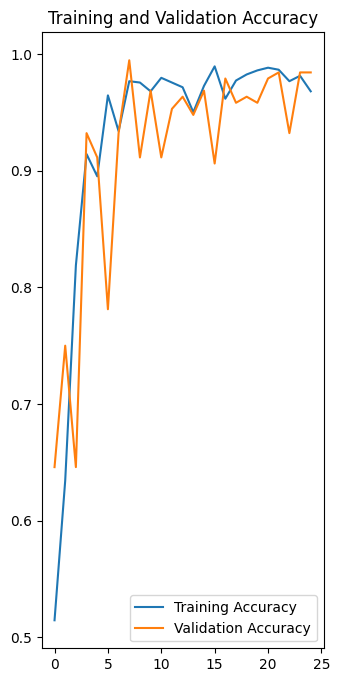

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(25),acc,label='Training Accuracy')
plt.plot(range(25),val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')



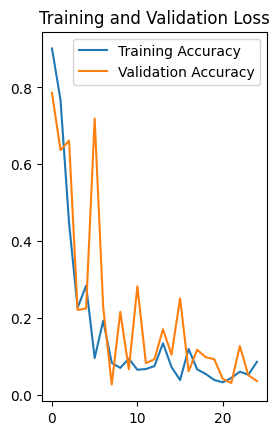

In [31]:
 plt.subplot(1,2,1)
plt.plot(range(25),loss,label='Training Accuracy')
plt.plot(range(25),val_loss,label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## checking results for test data

In [1]:
def predict(model,img) :
    img_array=tf.keras.utils.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_calss=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.nax(predictions[0])),2)
    return predicted_class,confidence

In [2]:
for images,labels in test_ds.take(1) :
    for i in range(12) :
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis(False)
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title("Actual: {}\n predicted: {}\nconfidence: {}".format(actual_class,predicted_class,confidence))
        
        
        

NameError: name 'test_ds' is not defined